<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_1**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

<br/>
CSV - IPL Ball-by-Ball 2008-2020.csv
CSV 2 - IPL Matches 2008-2020.csv

MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# AIM:

To Analyze the raw ball to ball collected by the enthusiastic IPL fans, and clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model that predicts the probablity of the winner


**Questions to be answered:**
* Q1.What are the data types? (Only numeric and categorical)

* Q2.Are there missing values?

* Q3.What are the likely distributions of the numeric variables?

* Q4.Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Q5.Which independent variables have missing data? How much?

* Q6.Do the training and test sets have the same data?

* Q7.In the predictor variables independent of all the other predictor variables?

* Q8.Which predictor variables are the most important?

* Q9.Do the ranges of the predictor variables make sense?

* Q10.What are the distributions of the predictor variables?   

In [2]:
pip install eli5

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [4]:
ipl_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv"
)

In [5]:
# Viewing data in the file
ipl_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
# Viewing the matches data in the file
ipl_matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [7]:
data=ipl_data.merge(ipl_matches_data,on='id')
data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# Q1. What are the data types?

In [8]:
data_types = data.dtypes
print(data_types)

id                    int64
inning                int64
over                  int64
ball                  int64
batsman              object
non_striker          object
bowler               object
batsman_runs          int64
extra_runs            int64
total_runs            int64
non_boundary          int64
is_wicket             int64
dismissal_kind       object
player_dismissed     object
fielder              object
extras_type          object
batting_team         object
bowling_team         object
city                 object
date                 object
player_of_match      object
venue                object
neutral_venue         int64
team1                object
team2                object
toss_winner          object
toss_decision        object
winner               object
result               object
result_margin       float64
eliminator           object
method               object
umpire1              object
umpire2              object
dtype: object


In [9]:
import pprint

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

pp = pprint.PrettyPrinter(indent=4)
print("Numeric Columns:")
pp.pprint(numeric_columns)
print("\nCategorical Columns:")
pp.pprint(categorical_columns)


Numeric Columns:
[   'id',
    'inning',
    'over',
    'ball',
    'batsman_runs',
    'extra_runs',
    'total_runs',
    'non_boundary',
    'is_wicket',
    'neutral_venue',
    'result_margin']

Categorical Columns:
[   'batsman',
    'non_striker',
    'bowler',
    'dismissal_kind',
    'player_dismissed',
    'fielder',
    'extras_type',
    'batting_team',
    'bowling_team',
    'city',
    'date',
    'player_of_match',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision',
    'winner',
    'result',
    'eliminator',
    'method',
    'umpire1',
    'umpire2']


# Q2. Are there any missing values?

In [10]:
# checking if the any data is missing
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64

Columns like `dismissal_kind`, `player_dismissed`, `fielder`, `extras_type`, and `bowling_team` have missing values. The most significant number of missing values are in `dismissal_kind`, `player_dismissed`, and `fielder`. This is expected as not every ball results in a dismissal or involves a fielder.

In [11]:
# Filter to display rows where 'bowling_team' is missing
missing_bowling_team = data[data['bowling_team'].isnull()]
print(missing_bowling_team)

            id  inning  over  ball         batsman     non_striker  \
57048   501265       1     0     1         NV Ojha       DA Warner   
57049   501265       1     0     2       DA Warner         NV Ojha   
57050   501265       1     1     1       DA Warner         NV Ojha   
57051   501265       1     1     2         NV Ojha       DA Warner   
57052   501265       1     1     3         NV Ojha       DA Warner   
...        ...     ...   ...   ...             ...             ...   
115654  829763       1     7     3  AB de Villiers   Mandeep Singh   
115655  829763       1     8     6  AB de Villiers   Mandeep Singh   
115656  829763       1     9     1   Mandeep Singh  AB de Villiers   
115657  829763       1     8     4  AB de Villiers   Mandeep Singh   
115658  829763       1     8     5  AB de Villiers   Mandeep Singh   

             bowler  batsman_runs  extra_runs  total_runs  ...  \
57048     AC Thomas             1           0           1  ...   
57049     AC Thomas        

**Using the IPL Matches 2008-2020.csv to fill in the missing value**

Taking the `id`, `team1`, and `team2` columns from `ipl_matches_data` dataset, along with the inning information from ball-by-ball `ipl_data` dataset to solve for missing values of `bowling_team`


 *Logic* -

In the 1st inning of a cricket match, the bowling team is


-> The team that is not the `toss_winner` if `toss_decision` is 'bat'.


-> Else it's the `toss_winner`.

For the 2nd innings, it's the opposite.



In [12]:
# Merging the ball-by-ball data with the matches data on the 'id' column
merged_data = data

# Func to determine the bowling team
def get_bowling_team(row):
    if row['inning'] == 1:
        return row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'bat' else row['team1']
    else:
        return row['team1'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'bat' else row['team2']

# Using get_bolwing_team function to determine the bowling team of the ball_by_ball dataset.

merged_data['bowling_team'] = merged_data.apply(get_bowling_team, axis=1)

In [13]:
#displaying the heads
print(merged_data.head())

       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...                  team2  \
0             1           0           1  ...  Kolkata Knight Riders   
1             1           0           1  ...  Kolkata Knight Riders   
2             0           0           0  ...  Kolkata Knight Riders   
3             1           0           1  ...  Kolkata Knight Riders   
4             1           0           1  ...  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs

In [14]:
# Checking if any data is missing in the new merged dataset
new_dataset = merged_data.isnull().sum()
print(new_dataset)


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64


In [15]:
data.drop(['date', 'city','player_of_match','neutral_venue','toss_winner','toss_decision','method', 'umpire1', 'umpire2','batsman', 'non_striker', 'bowler',
        'batsman_runs','extra_runs','result', 'non_boundary','eliminator','result_margin','dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], axis='columns',inplace=True)

In [16]:
data.head()

,id,inning,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner
0,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
2,335982,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
3,335982,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
4,335982,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders


In [17]:
data1=data.groupby(['id','inning']).sum()['total_runs']
data1=data1.reset_index()
# data1=data1[data1.inning==1]
data1

<ipython-input-17-73e4c70c99a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1=data.groupby(['id','inning']).sum()['total_runs']


,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [18]:
data1['Target']=data1['total_runs']+1
data1.drop(['total_runs'],axis='columns',inplace=True)
data1

,id,inning,Target
0,335982,1,223
1,335982,2,83
2,335983,1,241
3,335983,2,208
4,335984,1,130
...,...,...,...
1625,1237178,2,133
1626,1237180,1,190
1627,1237180,2,173
1628,1237181,1,157


In [19]:
data=data.merge(data1,on='id')
data

,id,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner,inning_y,Target
0,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
1,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,83
2,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
3,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2,83
4,335982,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386740,1237181,1,13,1,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,158
386741,1237181,1,13,2,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
386742,1237181,1,13,2,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,2,158
386743,1237181,1,13,3,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157


In [20]:
# data=data[(data.inning_x==2)]
# data

In [21]:
data = data.drop(['inning_x', 'inning_y', 'team1', 'team2'], axis='columns')
data.rename(columns={"total_runs": "Run_on_this_ball"}, inplace=True)


In [22]:
new_dataset = data.isnull().sum()
print(new_dataset)

id                    0
over                  0
ball                  0
Run_on_this_ball      0
is_wicket             0
batting_team          0
bowling_team          0
venue                 0
winner              553
Target                0
dtype: int64


In [23]:
print(data['winner'])

0         Kolkata Knight Riders
1         Kolkata Knight Riders
2         Kolkata Knight Riders
3         Kolkata Knight Riders
4         Kolkata Knight Riders
                  ...          
386740           Mumbai Indians
386741           Mumbai Indians
386742           Mumbai Indians
386743           Mumbai Indians
386744           Mumbai Indians
Name: winner, Length: 386745, dtype: object


In [24]:
data['winner'].fillna('Draw', inplace=True)


In [25]:
data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.batting_team=data.batting_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')
data.bowling_team=data.bowling_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [26]:
# data.batting_team.unique()

In [27]:
# data.bowling_team.unique()

In [28]:
# teams=data.bowling_team.unique()
# teams

In [29]:
data.isna().sum()

id                  0
over                0
ball                0
Run_on_this_ball    0
is_wicket           0
batting_team        0
bowling_team        0
venue               0
winner              0
Target              0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386745 entries, 0 to 386744
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                386745 non-null  int64 
 1   over              386745 non-null  int64 
 2   ball              386745 non-null  int64 
 3   Run_on_this_ball  386745 non-null  int64 
 4   is_wicket         386745 non-null  int64 
 5   batting_team      386745 non-null  object
 6   bowling_team      386745 non-null  object
 7   venue             386745 non-null  object
 8   winner            386745 non-null  object
 9   Target            386745 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 32.5+ MB


We have now solved the cruicial missing datas.

# Q3. What are the likely distributions of the numeric variables?

In [31]:
new_dataset = data

In [32]:
new_dataset.describe()

,id,over,ball,Run_on_this_ball,is_wicket,Target
count,3.867450e+05,386745.000000,386745.000000,386745.000000,386745.000000,386745.000000
mean,7.567863e+05,9.177600,3.615936,1.306628,0.049076,157.570435
std,3.061520e+05,5.676858,1.807096,1.598791,0.216028,30.042824
min,3.359820e+05,0.000000,1.000000,0.000000,0.000000,3.000000
25%,5.012270e+05,4.000000,2.000000,0.000000,0.000000,139.000000
50%,7.292970e+05,9.000000,4.000000,1.000000,0.000000,159.000000
75%,1.082628e+06,14.000000,5.000000,1.000000,0.000000,178.000000
max,1.237181e+06,19.000000,9.000000,7.000000,1.000000,264.000000


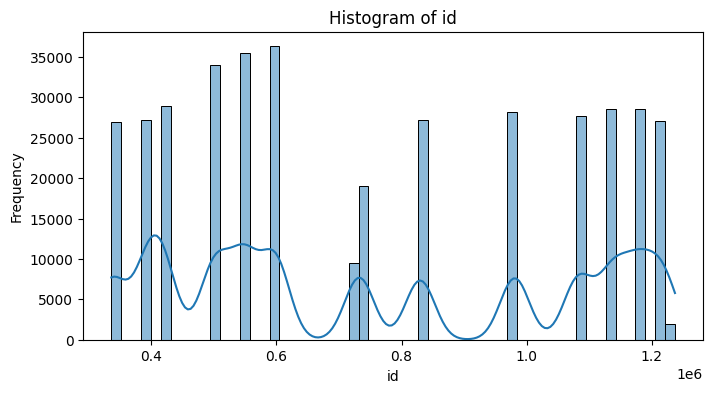

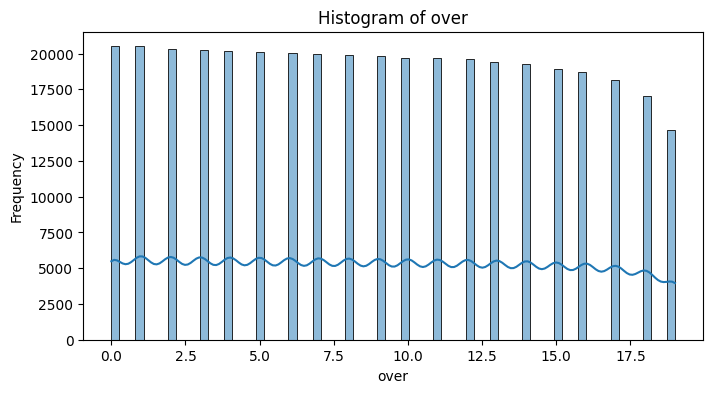

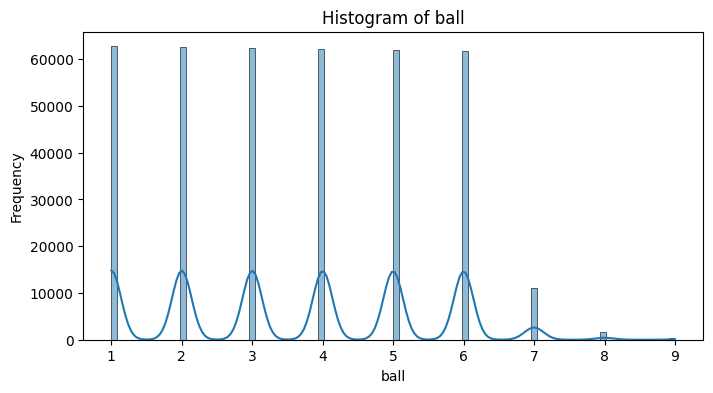

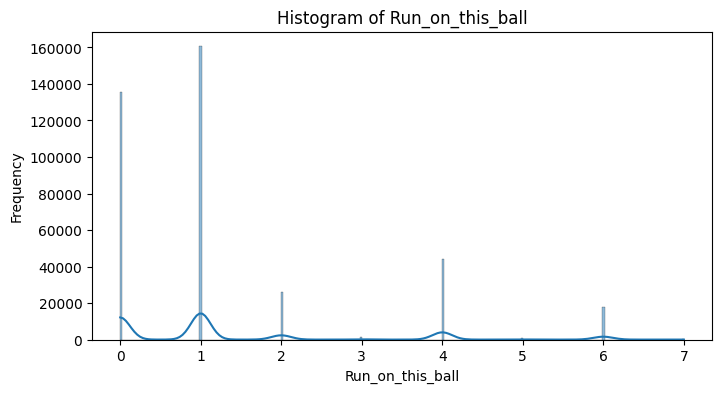

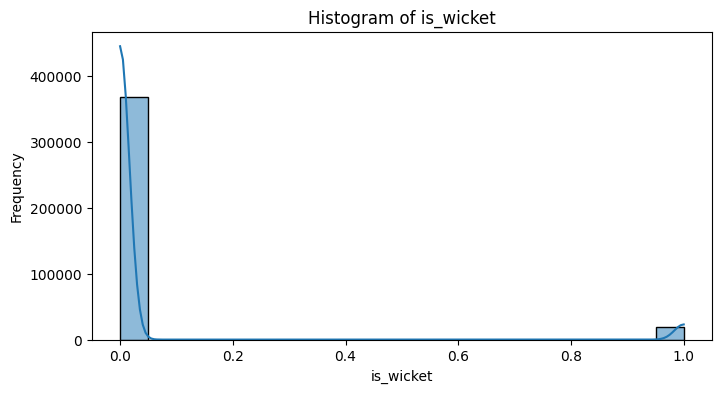

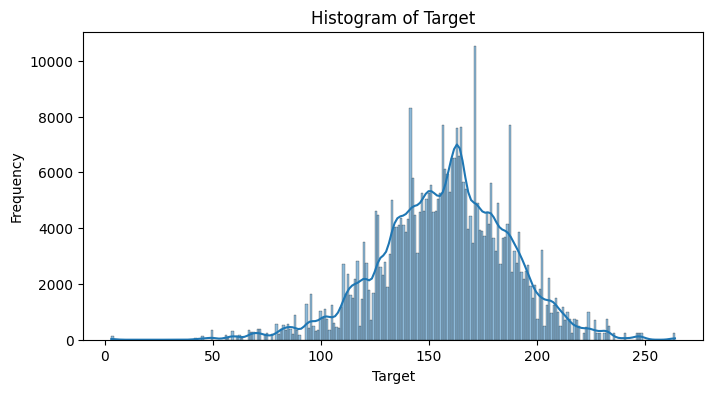

In [33]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting histograms for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

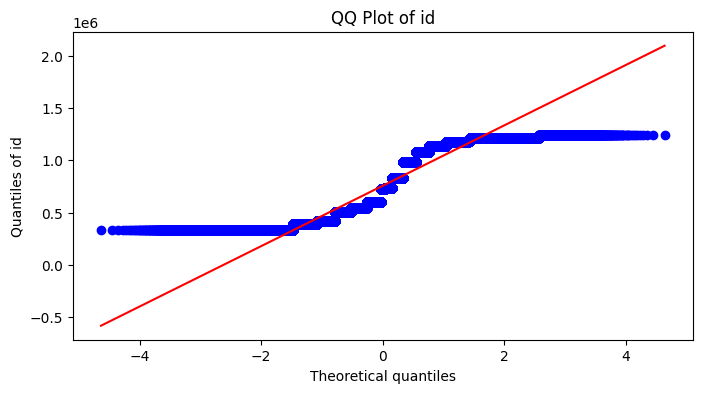

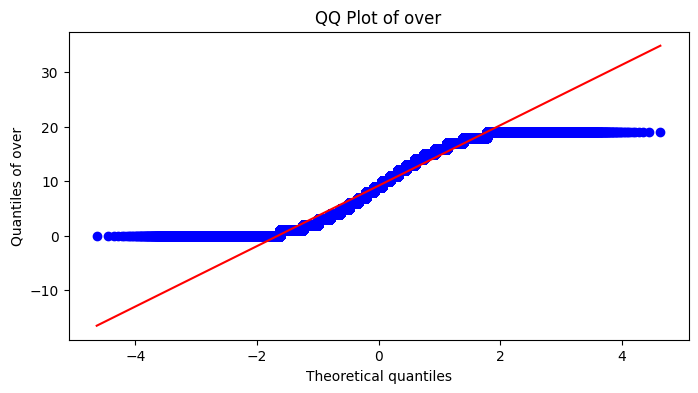

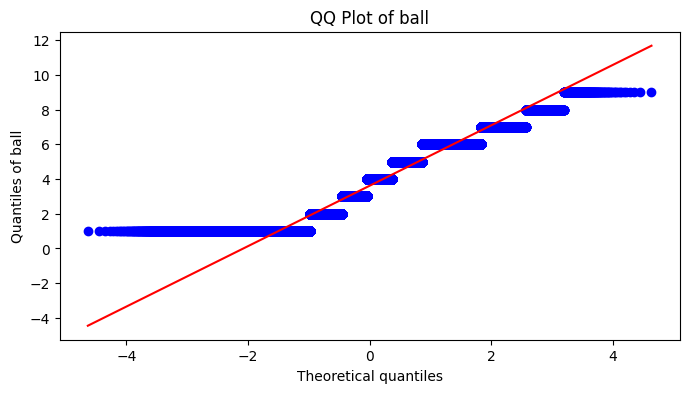

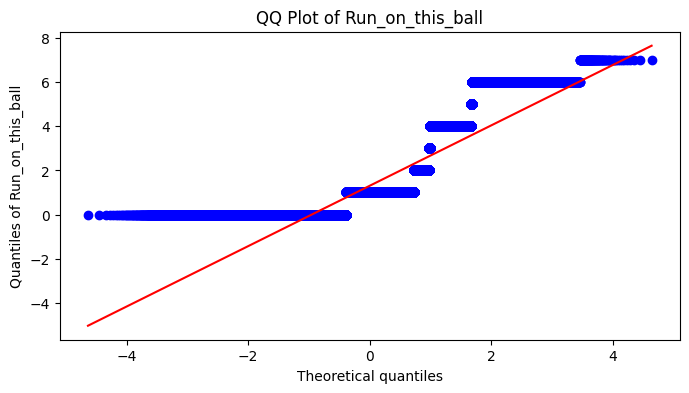

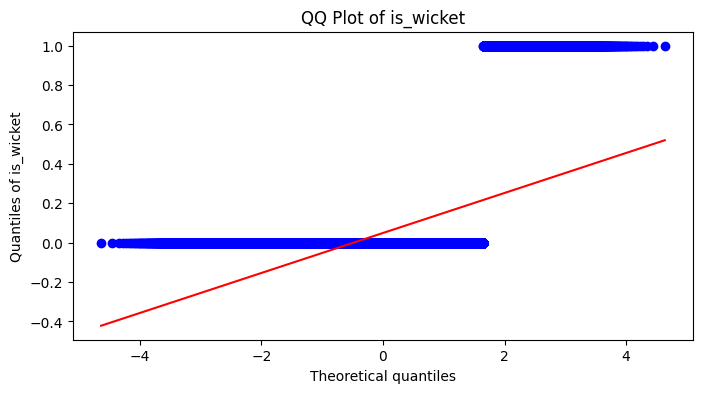

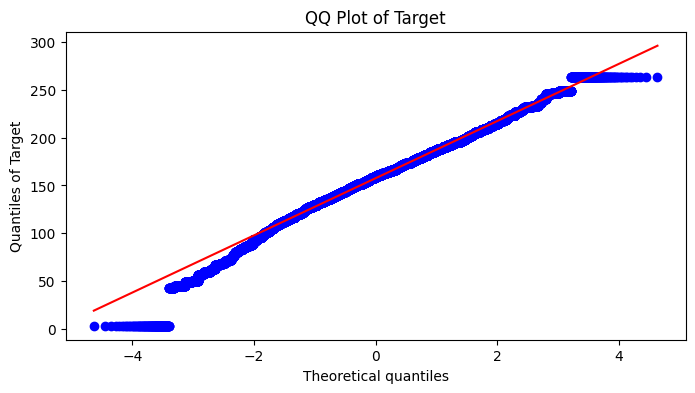

In [34]:
import scipy.stats as stats

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting QQ plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(numeric_data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.ylabel('Quantiles of ' + column)
    plt.show()

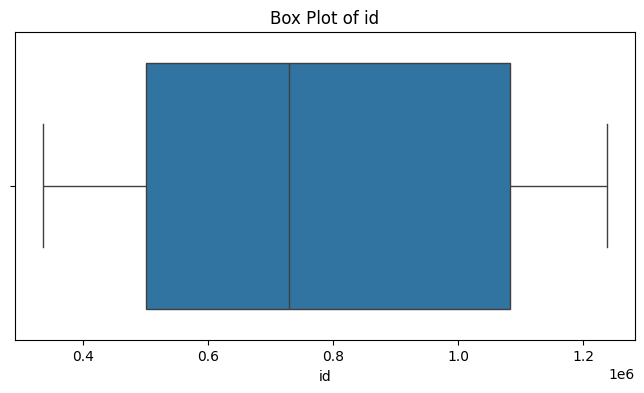

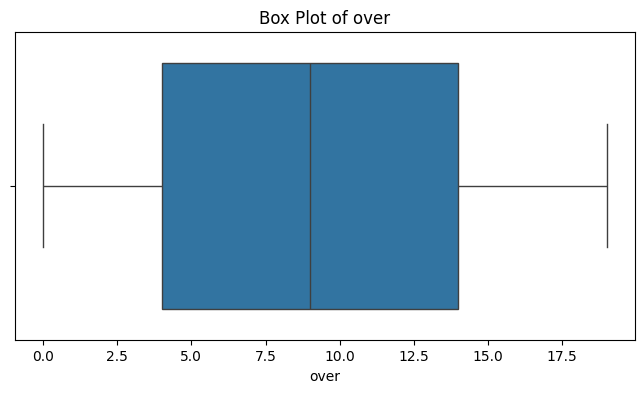

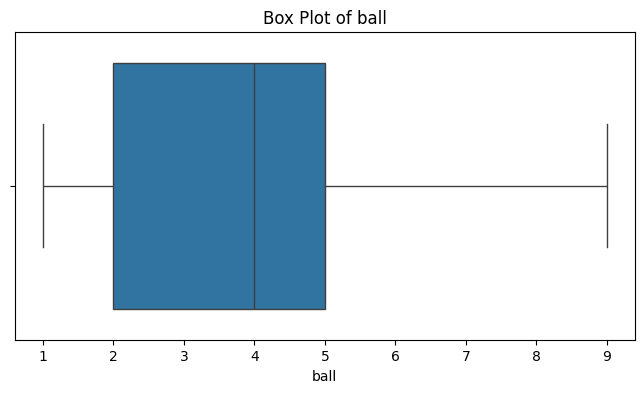

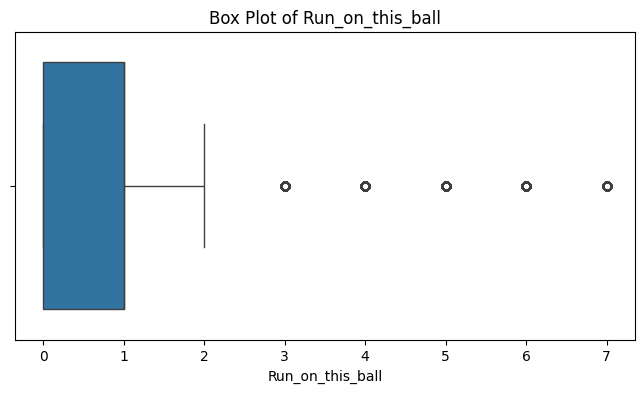

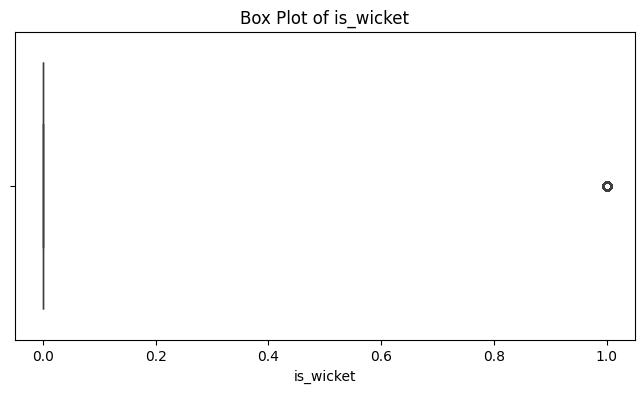

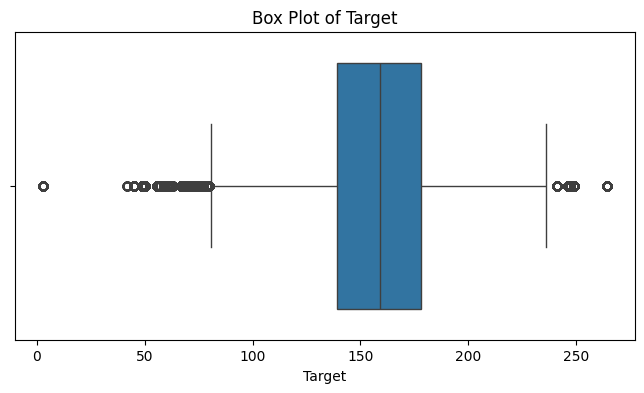

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting box plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


As we can see, the Histplots for this dataset's context wont make sense because Cricket has 6 balls per over
Id is just an identifier and not a numerical value of substance.

Hence, we focus on grouping the values like balls, over, is_wicket to predict The Target.

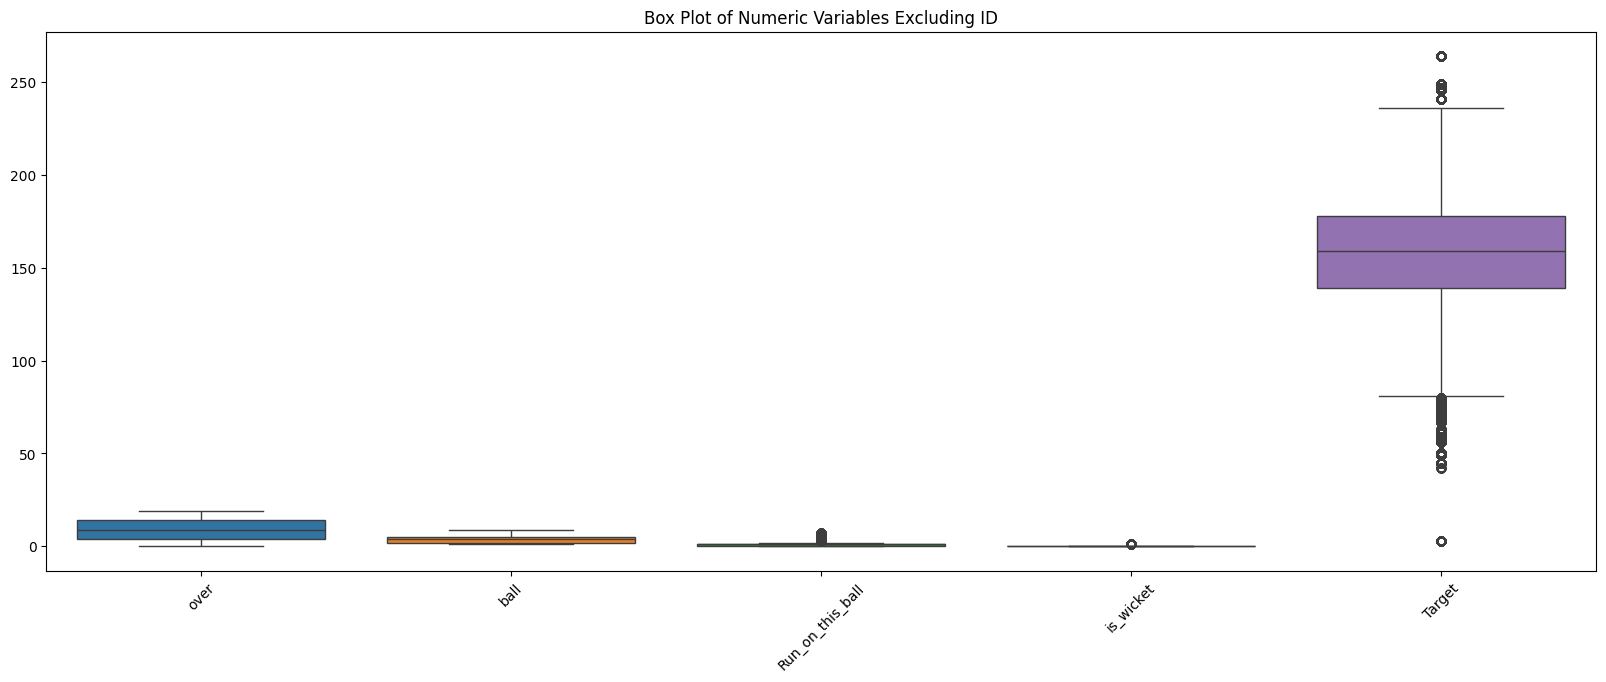

In [36]:
data_without_id = data.select_dtypes(include=['float64', 'int64']).drop('id', axis=1)

plt.figure(figsize=(20, 7))
sns.boxplot(data=data_without_id)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.title('Box Plot of Numeric Variables Excluding ID')
plt.show()

# Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To Predict the Target,
- Over
- Ball
- Run_on_this_ball
- is_wicket



Using Methods
1. Correlation Matrix
2. Random Forest Regressor
3. Univariate Feature selection

In [37]:
new_dataset.describe()

,id,over,ball,Run_on_this_ball,is_wicket,Target
count,3.867450e+05,386745.000000,386745.000000,386745.000000,386745.000000,386745.000000
mean,7.567863e+05,9.177600,3.615936,1.306628,0.049076,157.570435
std,3.061520e+05,5.676858,1.807096,1.598791,0.216028,30.042824
min,3.359820e+05,0.000000,1.000000,0.000000,0.000000,3.000000
25%,5.012270e+05,4.000000,2.000000,0.000000,0.000000,139.000000
50%,7.292970e+05,9.000000,4.000000,1.000000,0.000000,159.000000
75%,1.082628e+06,14.000000,5.000000,1.000000,0.000000,178.000000
max,1.237181e+06,19.000000,9.000000,7.000000,1.000000,264.000000


In [38]:
new_dataset.corr()

<ipython-input-38-a491ed2114aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.corr()


,id,over,ball,Run_on_this_ball,is_wicket,Target
id,1.000000,0.007761,-0.001965,0.024723,-0.002825,0.163891
over,0.007761,1.000000,-0.006904,0.087300,0.073795,0.048759
ball,-0.001965,-0.006904,1.000000,0.006760,0.004534,0.005258
Run_on_this_ball,0.024723,0.087300,0.006760,1.000000,-0.180130,0.092958
is_wicket,-0.002825,0.073795,0.004534,-0.180130,1.000000,-0.020829
Target,0.163891,0.048759,0.005258,0.092958,-0.020829,1.000000


**METHOD 1- Correlation** **Matrix**

<ipython-input-39-51c8fbe34be3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


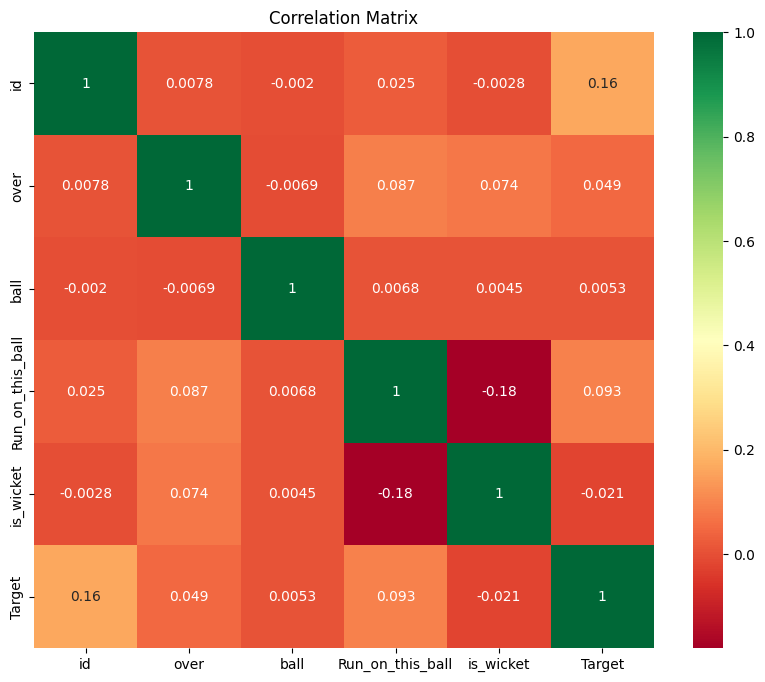

In [39]:
numeric_data = pd.DataFrame(new_dataset)

# Display the correlation matrix using Seaborn's heatmap
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title('Correlation Matrix')
plt.show()

checking values which are weakely correlated


In [40]:
correlations = numeric_data.corr()['Target'].abs().sort_values(ascending=False)
print(correlations)

Target              1.000000
id                  0.163891
Run_on_this_ball    0.092958
over                0.048759
is_wicket           0.020829
ball                0.005258
Name: Target, dtype: float64


<ipython-input-40-58102e63bbf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = numeric_data.corr()['Target'].abs().sort_values(ascending=False)


**Method 2 - RANDOM FOREST REGRESSOR**

In [41]:
feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']

In [42]:
from sklearn.ensemble import RandomForestRegressor
feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']
# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['Target']     # Assuming 'total_runs' is your target variable

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


Run_on_this_ball    0.521811
over                0.272417
ball                0.181447
is_wicket           0.024325
dtype: float64


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']
# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['Target']     # 'total_runs' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)


RMSE: 29.853801133877433
Run_on_this_ball    0.491131
over                0.290565
ball                0.192712
is_wicket           0.025592
dtype: float64


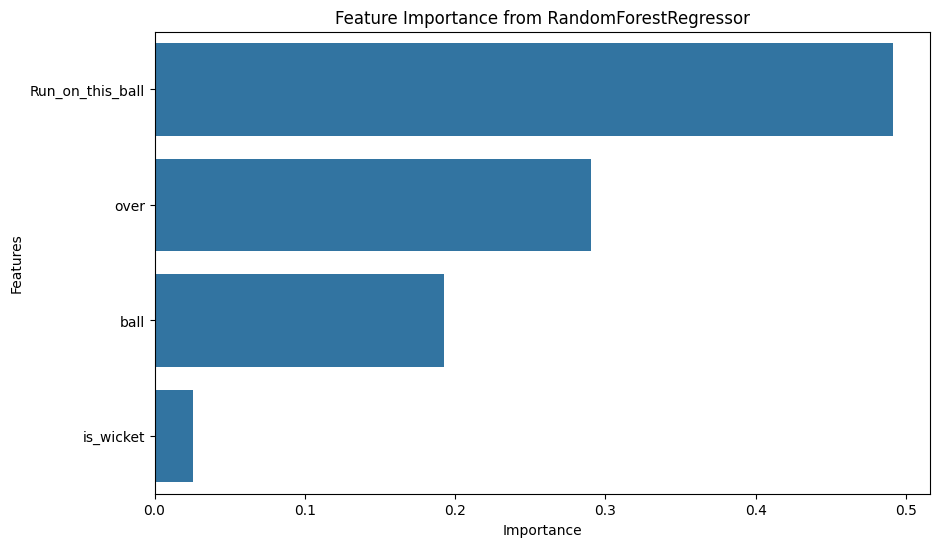

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is the Series you obtained from the RandomForestRegressor
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()


**Method 3 - F TEST Feature**

In [45]:

from sklearn.feature_selection import f_regression, SelectKBest

# Select the top k features based on F-test
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features and their scores
selected_features = X.columns[selector.get_support()]
scores = selector.scores_
print(pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False))

            Feature        Score
2  Run_on_this_ball  3371.048982
0              over   921.633680
3         is_wicket   167.867275
1              ball    10.693445


# Q5.Which independent variables have missing data? How much?

None



In [46]:

import statsmodels.api as sm

targets = ['Target']
features = [
    'over', 'ball', 'is_wicket',
]

for i in targets:
    model = sm.OLS(new_dataset[i], new_dataset[features]).fit()
    print(f"Model Summary for {i}:")
    print(model.summary())
    print("\n\n")


Model Summary for Target:
                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          6.944e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        04:34:15   Log-Likelihood:                     -2.1540e+06
No. Observations:              386745   AIC:                                  4.308e+06
Df Residuals:                  386742   BIC:                                  4.308e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [47]:
# List of columns to check for missing values
columns_to_check = ['over', 'ball', 'is_wicket']

# Loop through the columns and print missing value counts
for column in columns_to_check:
    missing_count = merged_data[column].isnull().sum()
    print(f"Missing values in '{column}': {missing_count}")


Missing values in 'over': 0
Missing values in 'ball': 0
Missing values in 'is_wicket': 0



# Q6. Do the training and test sets have the same data?


In [48]:
from sklearn.model_selection import train_test_split

X = new_dataset[
    [
     'over', 'ball', 'is_wicket',
    ]
]

y = new_dataset["Target"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


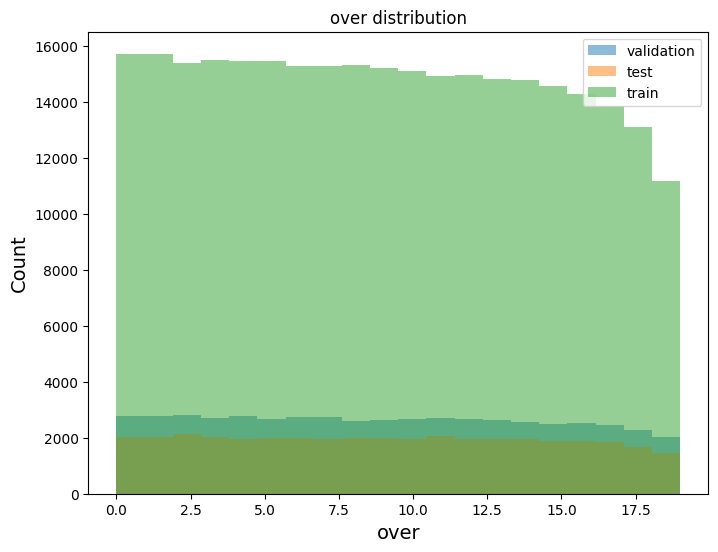

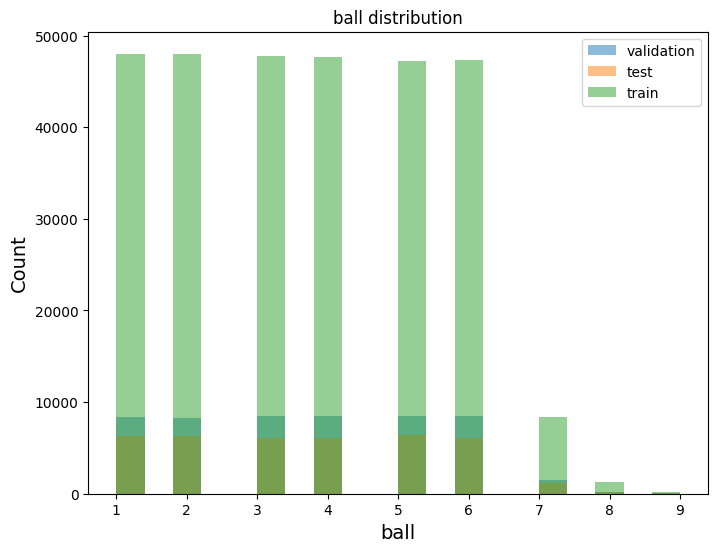

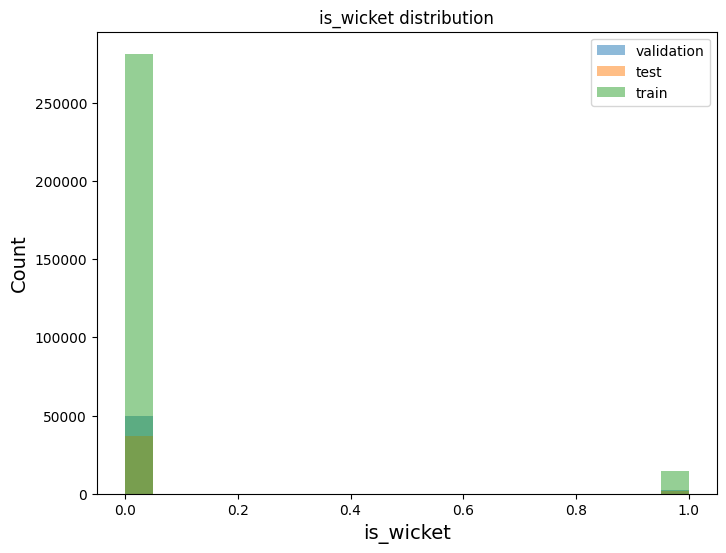

In [49]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    ['over', 'ball', 'is_wicket'
    ]
]

X_val_plot = X_val[
    [
        'over', 'ball', 'is_wicket',
    ]
]

X_train_plot = X_train[
    [
      'over', 'ball', 'is_wicket',
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

# Q7. Is the predictor variables independent of all the other predictor variables?


<ipython-input-50-c9e0d4fb261a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


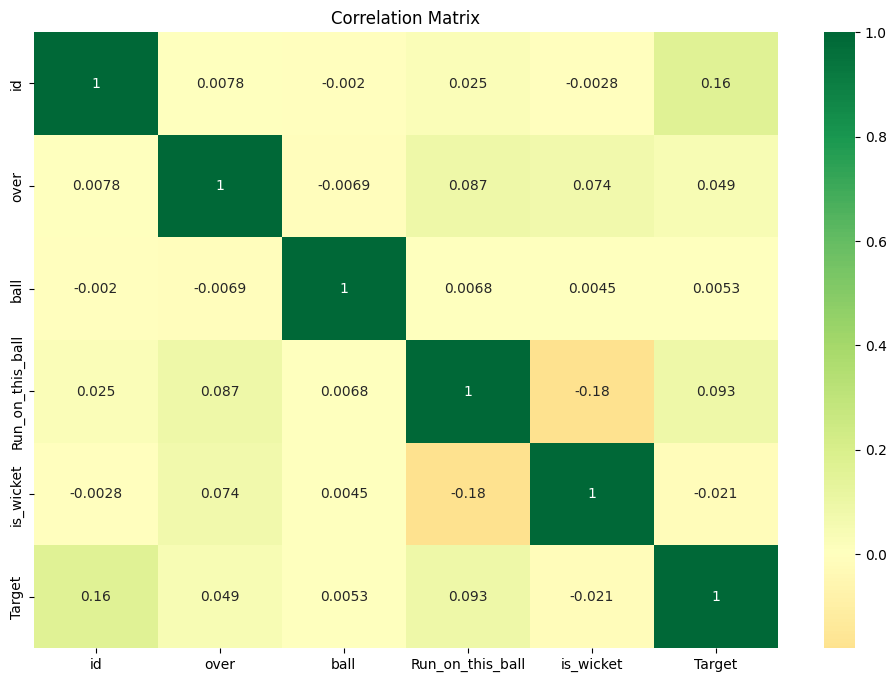

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
X = new_dataset
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", center=0)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-51-239a5902b71a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

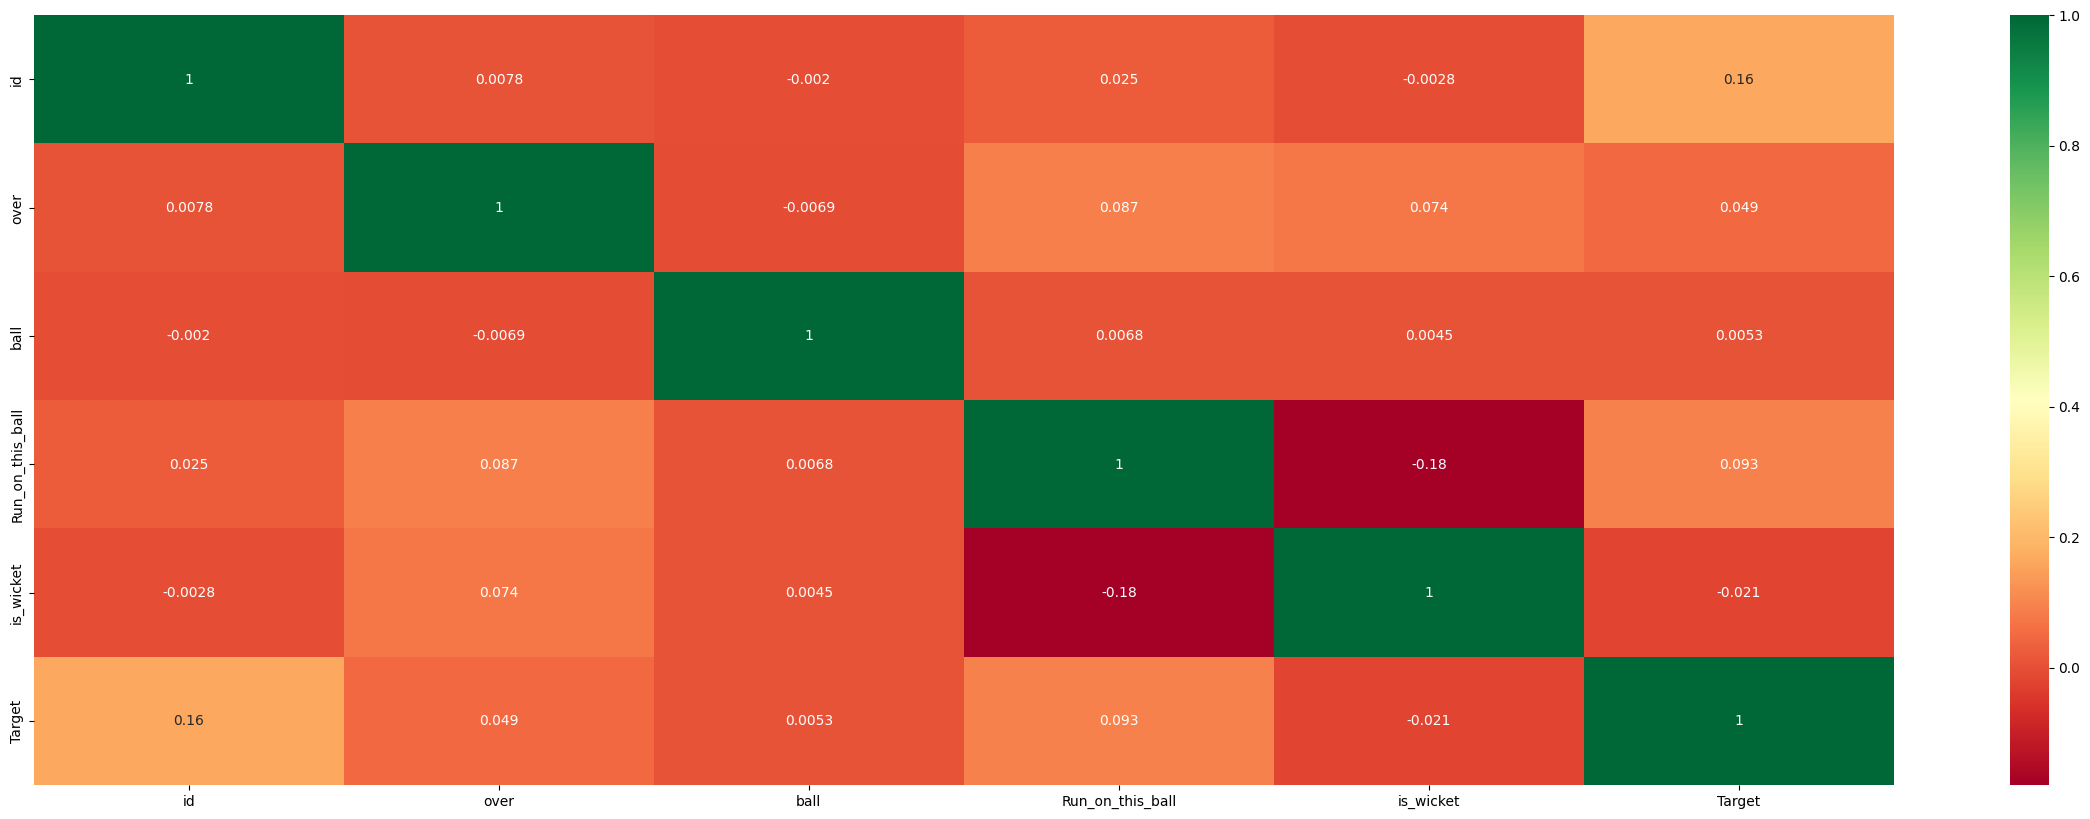

In [51]:
plt.figure(figsize=(30, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn")

Most data variables show very low correlation values with each other, close to zero, which suggests there is no strong linear relationship between them.

This indicates that the predictors are largely independent.

* There is a moderate positive correlation (0.16) between id and Target. However, this is likely not a meaningful relationship, as id is typically a unique identifier for the observations and should not have a predictive relationship with other variables.

* The variable is_wicket has a slight negative correlation with Run_on_this_ball (-0.18), which may indicate that when a wicket falls, fewer runs are scored on that ball, which aligns with the nature of the game.


# Q8 Which predictor variables are the most important?
* Run_on_this_Ball

# Q9. Do the ranges of the predictor variables make sense?
* Yes as expected the Run_on_this_ball are a component of total_runs a.k.a Target.


# Q10. What are the distributions of the predictor variables?

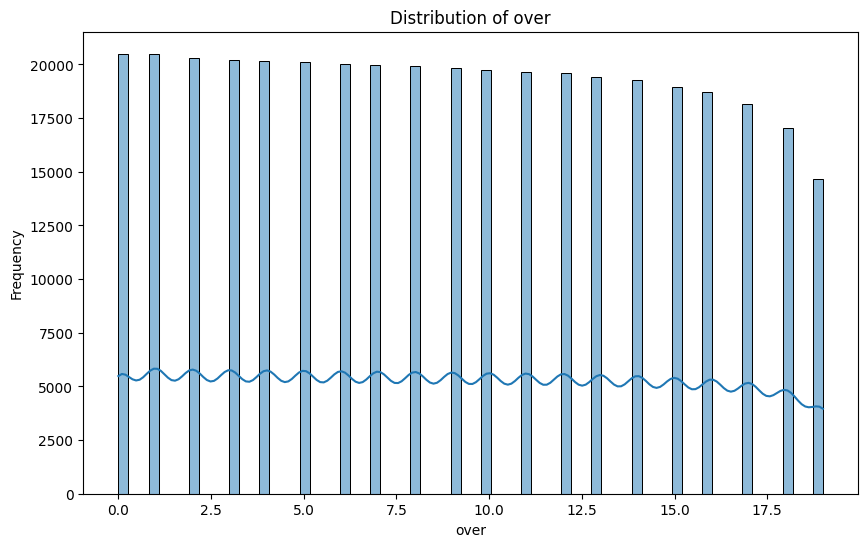

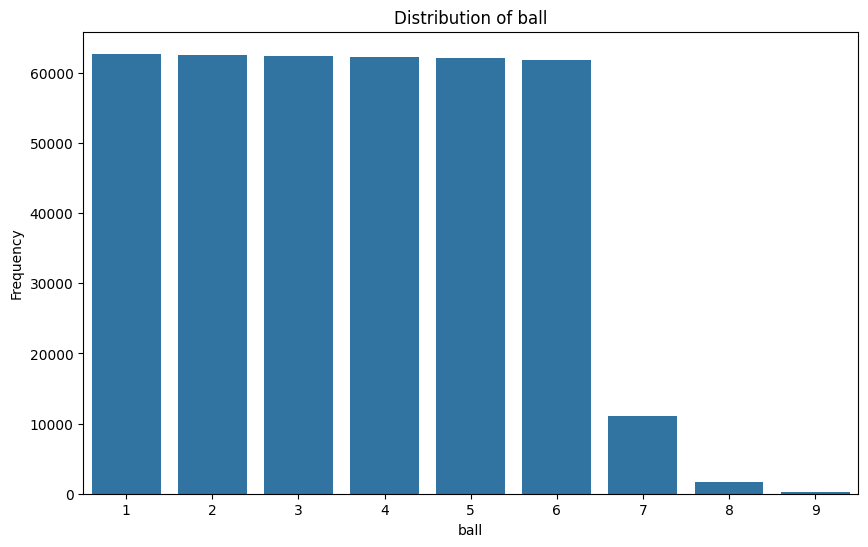

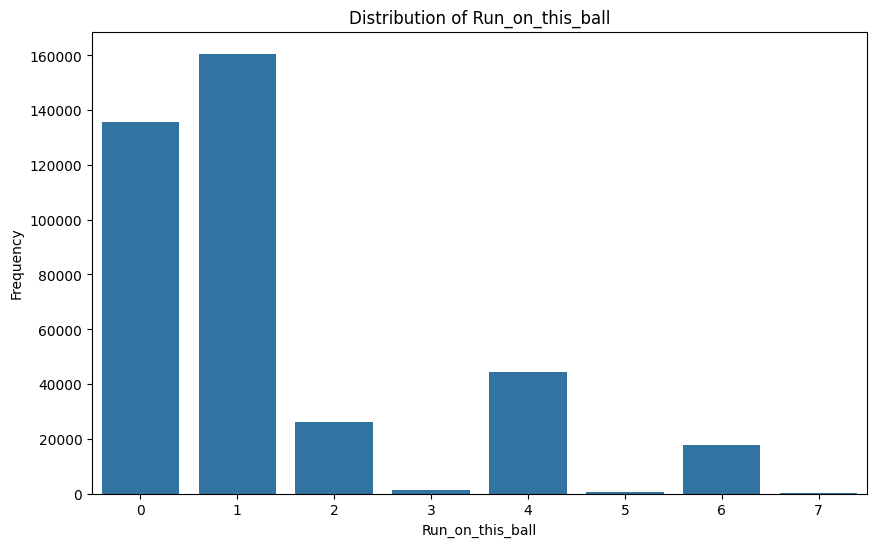

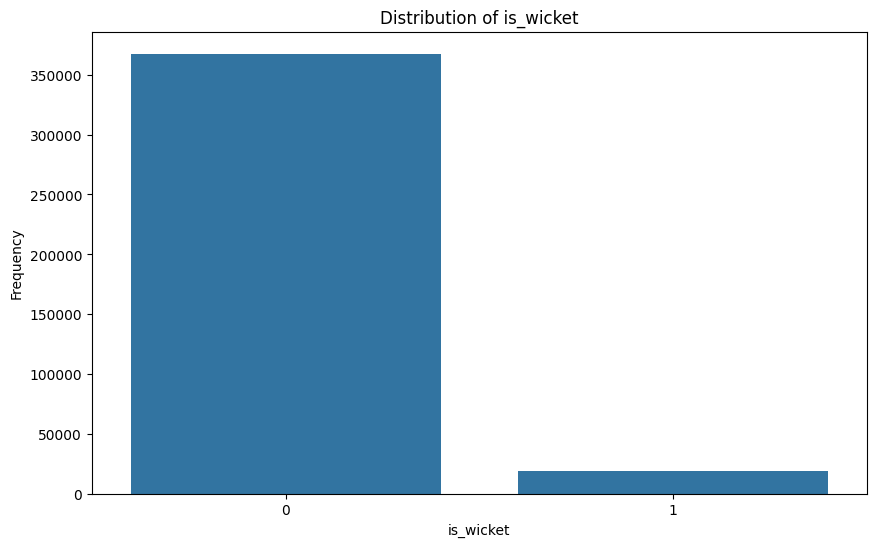

In [53]:
predictors = ['over', 'ball', 'Run_on_this_ball', 'is_wicket']

for predictor in predictors:
    plt.figure(figsize=(10, 6))
    # If the variable is continuous, use a histogram with a KDE
    if new_dataset[predictor].nunique() > 10:  # Arbitrary cutoff for determining if the variable is continuous
        sns.histplot(new_dataset[predictor], kde=True)
    # If the variable is categorical or discrete, use a count plot
    else:
        sns.countplot(x=new_dataset[predictor])
    plt.title(f'Distribution of {predictor}')
    plt.ylabel('Frequency')
    plt.xlabel(predictor)
    plt.show()


* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix

In [54]:
# Removing outliers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictor_variables = ['over', 'ball', 'Run_on_this_ball', 'is_wicket']
# Split the dataset into predictor variables (X) and target variable (y)
X = data[predictor_variables]
y = data["Target"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without removing outliers
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train a linear regression model after removing outliers
# Define a function to remove outliers based on z-scores
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[(z_scores.abs() < threshold).all(axis=1)]

# Remove outliers from the training set
X_train_no_outliers = remove_outliers_zscore(X_train)
y_train_no_outliers = y_train[X_train.index.isin(X_train_no_outliers.index)]

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set after removing outliers
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_without_outliers = mean_squared_error(y_test, y_pred_no_outliers)

print("Mean Squared Error with outliers:", mse_with_outliers)
print("Mean Squared Error without outliers:", mse_without_outliers)

Mean Squared Error with outliers: 889.2590982906454
Mean Squared Error without outliers: 889.2710034964717


The Mean Squared Error (MSE) before and after removing outliers is very close in value, which suggests that outliers did not significantly affect the predictions of your linear regression model for this particular dataset.

In [55]:
import numpy as np
import pandas as pd

# Function to randomly introduce missing values
def introduce_missingness(new_dataset, column, percent):
    new_dataset = new_dataset.copy()
    np.random.seed(0)
    mask = np.random.rand(len(new_dataset)) < percent
    new_dataset.loc[mask, column] = np.nan
    return new_dataset

# Introduce 1%, 5%, and 10% missingness
data_1p_missing = introduce_missingness(new_dataset, 'Run_on_this_ball', 0.01)
data_5p_missing = introduce_missingness(new_dataset, 'Run_on_this_ball', 0.05)
data_10p_missing = introduce_missingness(new_dataset, 'Run_on_this_ball', 0.10)


In [56]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_1p_missing, 'Run_on_this_ball')
median_imputed_data = impute_data('median', data_1p_missing, 'Run_on_this_ball')
knn_imputed_data = impute_data('knn', data_1p_missing, 'Run_on_this_ball')


In [57]:
from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_1p_missing, mean_imputed_data, 'Run_on_this_ball')
mae_median = evaluate_imputation(data_1p_missing, median_imputed_data, 'Run_on_this_ball')
mae_knn = evaluate_imputation(data_1p_missing, knn_imputed_data, 'Run_on_this_ball')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


MAE for Mean Imputation: 1.114611207661861
MAE for Median Imputation: 0.9366250954441334
MAE for KNN Imputation: 1.114611207661861


Removing 5%

In [59]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_5p_missing, 'Run_on_this_ball')
median_imputed_data = impute_data('median', data_5p_missing, 'Run_on_this_ball')
knn_imputed_data = impute_data('knn', data_5p_missing, 'Run_on_this_ball')

from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_5p_missing, mean_imputed_data, 'Run_on_this_ball')
mae_median = evaluate_imputation(data_5p_missing, median_imputed_data, 'Run_on_this_ball')
mae_knn = evaluate_imputation(data_5p_missing, knn_imputed_data, 'Run_on_this_ball')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


MAE for Mean Imputation: 1.171971263814804
MAE for Median Imputation: 1.0061057642554072
MAE for KNN Imputation: 1.114611207661861


Removing 10%

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_10p_missing, 'Run_on_this_ball')
median_imputed_data = impute_data('median', data_10p_missing, 'Run_on_this_ball')
knn_imputed_data = impute_data('knn', data_10p_missing, 'Run_on_this_ball')

from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_10p_missing, mean_imputed_data, 'Run_on_this_ball')
mae_median = evaluate_imputation(data_10p_missing, median_imputed_data, 'Run_on_this_ball')
mae_knn = evaluate_imputation(data_10p_missing, knn_imputed_data, 'Run_on_this_ball')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


In [ ]:

pip install fancyimpute


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from fancyimpute import KNN, IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate missing values in X_train
np.random.seed(42)
missing_percentage = [0.01, 0.05, 0.1]

for percentage in missing_percentage:
    missing_mask_train = np.random.rand(*X_train.shape) < percentage
    X_train_missing = X_train.copy()
    X_train_missing[missing_mask_train] = np.nan

    print(f"Missing Percentage: {percentage * 100}%")

    # Method 1: Simple Imputation (mean)
    imputer = SimpleImputer(strategy='mean')
    X_train_simple_imputed = imputer.fit_transform(X_train_missing)

    # Method 2: k-Nearest Neighbors Imputation
    X_train_knn_imputed = KNN(k=5).fit_transform(X_train_missing)

    # Method 3: Iterative Imputation
    X_train_iterative_imputed = IterativeImputer(random_state=42).fit_transform(X_train_missing)

    # Applying the same missing mask to the test set
    missing_mask_test = np.random.rand(*X_test.shape) < percentage
    X_test_missing = X_test.copy()
    X_test_missing[missing_mask_test] = np.nan

    # Printing imputation method and check accuracy on the test set
    imputation_methods = ['Simple Imputation', 'k-NN Imputation', 'Iterative Imputation']
    imputed_datasets = [
        X_train_simple_imputed, X_train_knn_imputed, X_train_iterative_imputed
    ]

    for method, imputed_data in zip(imputation_methods, imputed_datasets):
        # Classification problem
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(imputed_data, y_train)

        # Impute missing values on the test set using the same method
        if method == 'Simple Imputation':
            X_test_imputed = imputer.transform(X_test_missing)
        elif method == 'k-NN Imputation':
            X_test_imputed = KNN(k=5).fit_transform(X_test_missing)
        elif method == 'Iterative Imputation':
            X_test_imputed = IterativeImputer(random_state=42).fit_transform(X_test_missing)

        y_pred = clf.predict(X_test_imputed)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"{method} - Accuracy on Test Set: {accuracy:.4f}")
        print(f"{method} - Confusion Matrix:")
        print(cm)
        print("\n")


Thank you.